In [2]:
# import libraries
import pandas as pd
import numpy as np

# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression


# Scikit-learn (machine learning)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Import libraries and modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

# Import scit-Learn module for the algorithm/model: Linear Regression
from sklearn.model_selection import train_test_split

# Import scit-Learn module for K-fold cross-validation - algorithm/model evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [5]:
# The raw file has no header row, so we add column names manually
col_names = [
    "Sex", "Length", "Diameter", "Height",
    "Whole_weight", "Shucked_weight", "Viscera_weight",
    "Shell_weight", "Rings"
]

In [6]:
df = pd.read_csv('C:/Users/DKell/Downloads/abalone.csv', header=None, names=col_names)

In [7]:
# Quick look at the data
print(df.head())
print(df.info())
print(df.isnull().sum())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-nu

In [11]:
#Check for abnormal

print(df.describe())

            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

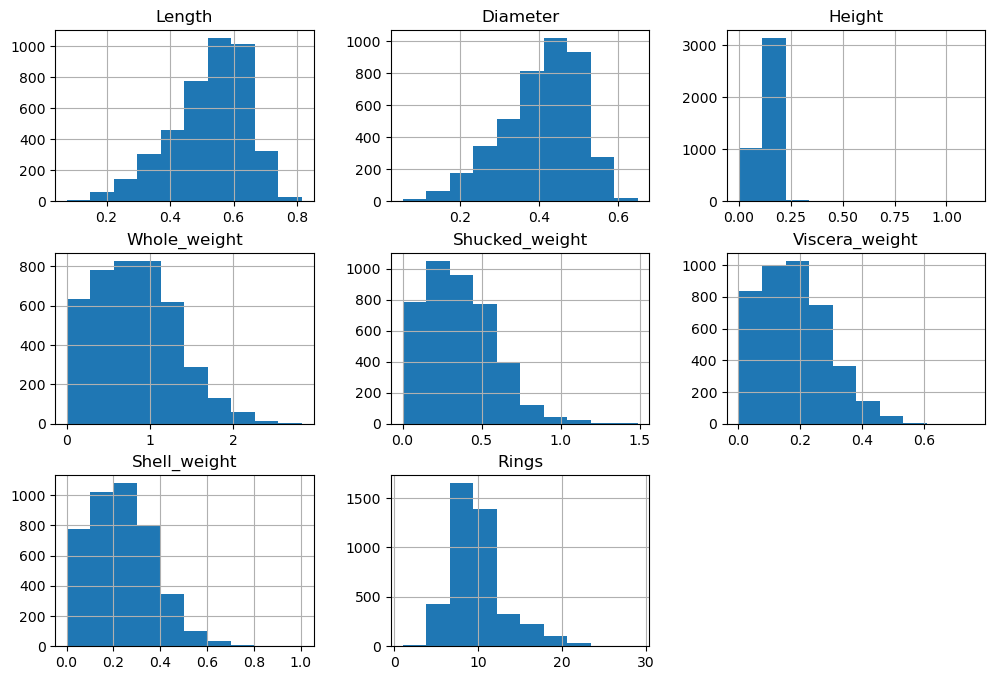

In [11]:
# Pliot histogram for each numberic variable/attribute of the dataset
# VIP NOTES: The first variable ID is also plotted. However the plot should be ignored

df.hist(figsize=(12, 8))
plt.show()

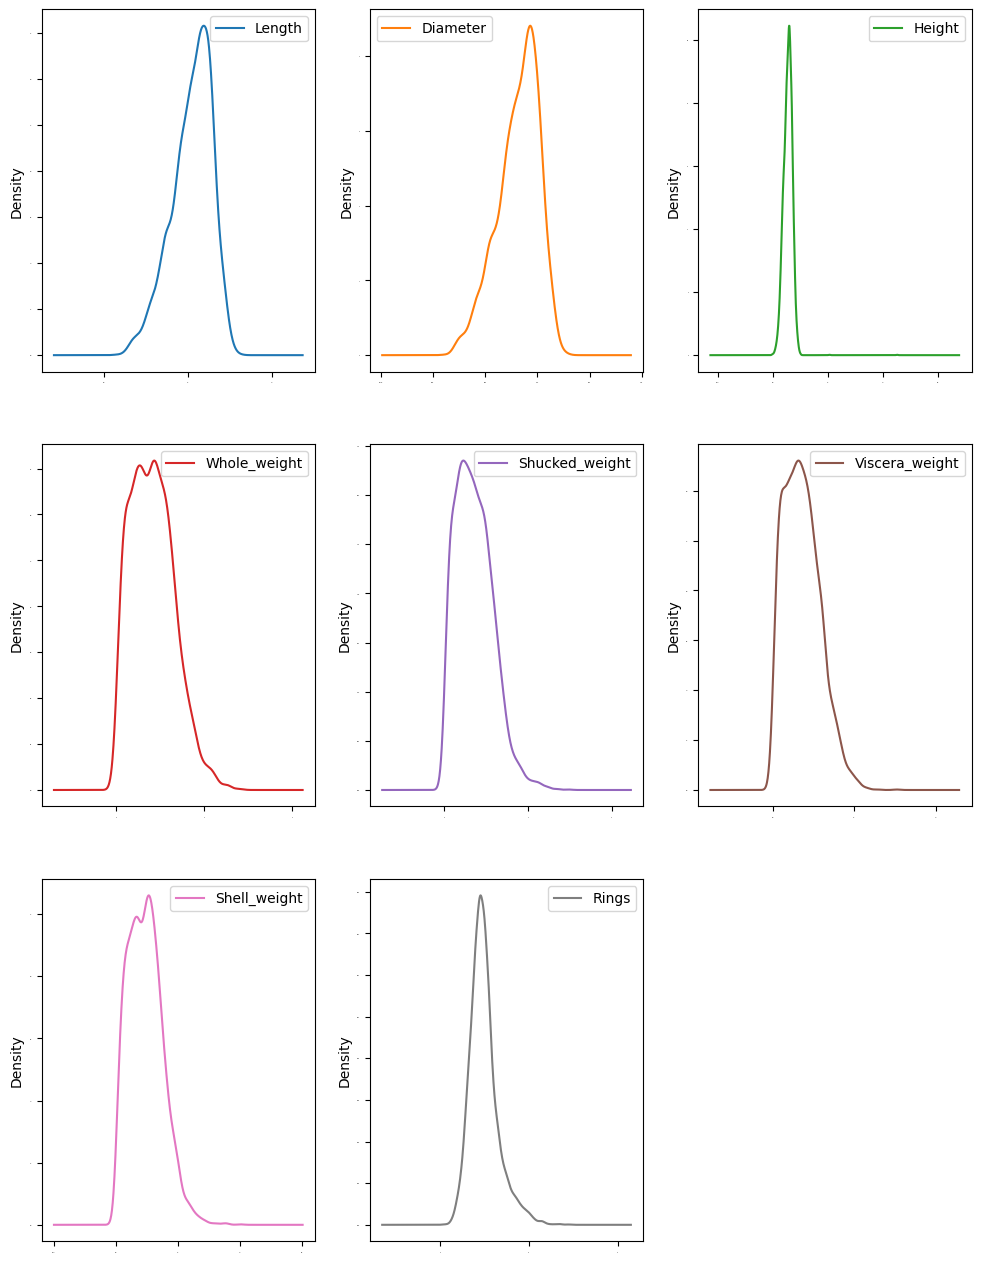

In [13]:
# Destiny plots
# IMPORTANT NOTES: 5 numberic variables --> at least 5 plots --> layout (2, 3): 2 rows, each row with 3 plots

df.plot(kind='density', subplots=True, layout=(3, 3),
        sharex=False, legend=True, fontsize=1, figsize=(12, 16))
plt.show()

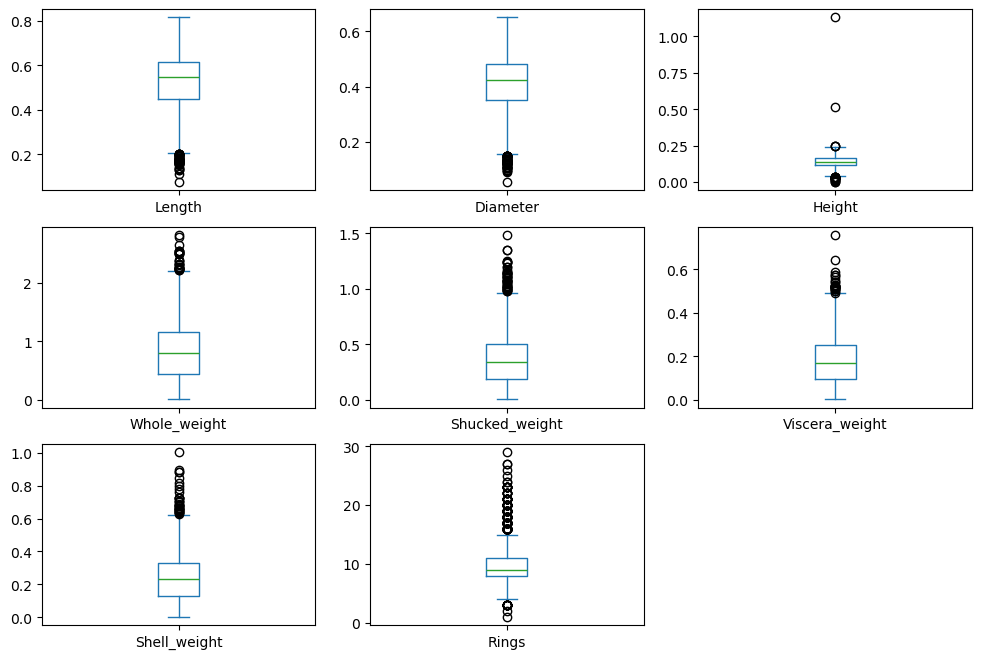

In [14]:
df.plot(kind='box', subplots=True, layout=(3, 3),
        sharex=False, sharey=False, figsize=(12, 8))
plt.show()

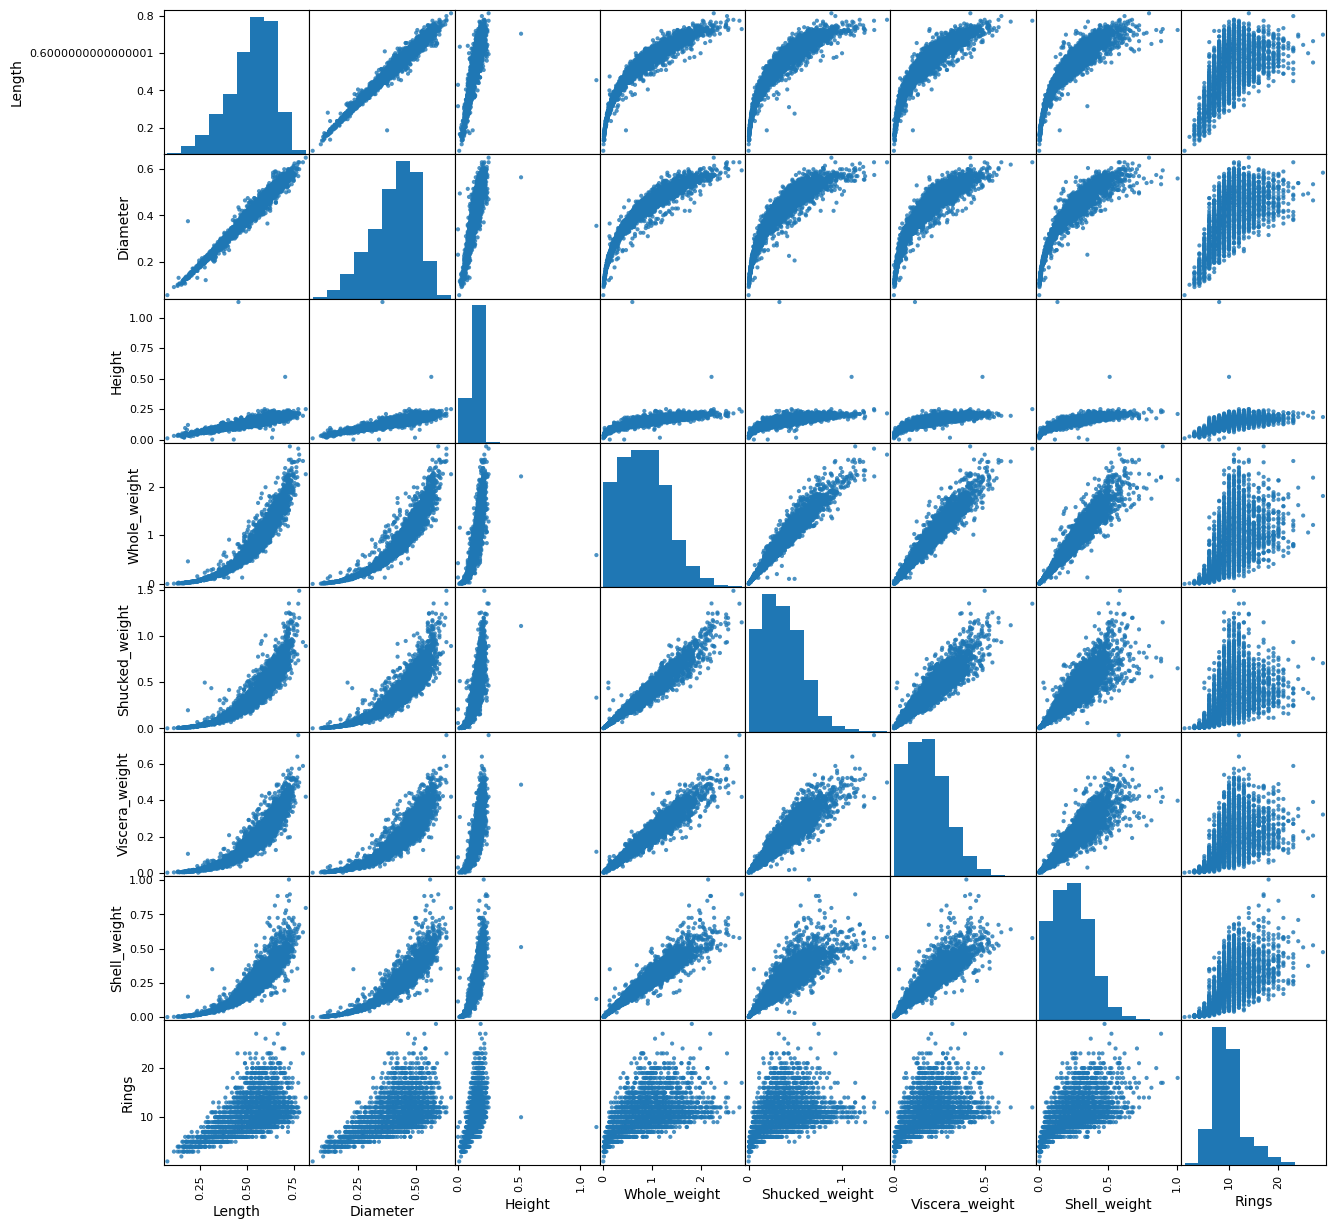

In [15]:
# scatter plot matrix

scatter_matrix(df, alpha=0.8, figsize=(15,15))
plt.show()

In [12]:
# Check for zero or negative values in numeric columns
numeric_cols = ["Length","Diameter","Height","Whole_weight",
                "Shucked_weight","Viscera_weight","Shell_weight","Rings"]

for col in numeric_cols:
    print(col, (df[col] <= 0).sum(), "values <= 0")

Length 0 values <= 0
Diameter 0 values <= 0
Height 2 values <= 0
Whole_weight 0 values <= 0
Shucked_weight 0 values <= 0
Viscera_weight 0 values <= 0
Shell_weight 0 values <= 0
Rings 0 values <= 0


In [13]:
# Handle abnormal values and create Age

# Remove rows with Height <= 0 as unrealistic / measurement errors
df_clean = df[df["Height"] > 0].copy()

# The target is Age in years: Rings + 1.5
df_clean["Age"] = df_clean["Rings"] + 1.5

print(df_clean.describe())
print("Original rows:", len(df), "Cleaned rows:", len(df_clean))

            Length    Diameter       Height  Whole_weight  Shucked_weight  \
count  4175.000000  4175.00000  4175.000000   4175.000000     4175.000000   
mean      0.524065     0.40794     0.139583      0.829005        0.359476   
std       0.120069     0.09922     0.041725      0.490349        0.221954   
min       0.075000     0.05500     0.010000      0.002000        0.001000   
25%       0.450000     0.35000     0.115000      0.442250        0.186250   
50%       0.545000     0.42500     0.140000      0.800000        0.336000   
75%       0.615000     0.48000     0.165000      1.153500        0.502000   
max       0.815000     0.65000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings          Age  
count     4175.000000   4175.000000  4175.000000  4175.000000  
mean         0.180653      0.238834     9.935090    11.435090  
std          0.109605      0.139212     3.224227     3.224227  
min          0.000500      0.001500     1.000000  

In [14]:
# Save cleaned dataset for submission
df_clean.to_csv("abalone_clean.csv", index=False)

In [33]:
# Split the dataset --> training sub-dataset: 67% test sub-dataset: 33%
test_size = 0.33


# Predictors and target
X = df_clean[["Sex","Length","Diameter","Height",
              "Whole_weight","Shucked_weight","Viscera_weight","Shell_weight"]]
Y = df_clean["Age"]

# Selection of records to include in which sub-dataset must be done randomly
# Use this seed for randomization
seed = 7

# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [43]:
# Build the model
model = LinearRegression()

# First, ensure X_train and Y_train contain only numerical data
# You need to convert categorical variables to numerical using techniques like:
# 1. One-hot encoding
# 2. Label encoding
# 3. Or remove text columns

# Example using pandas for preprocessing:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming X_train is a DataFrame with mixed data types
# Identify categorical columns (those with string values)
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
if len(categorical_cols) > 0:
    # Changed 'sparse=False' to 'sparse_output=False' to match newer scikit-learn versions
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_cats = encoder.fit_transform(X_train[categorical_cols])
    
    # Convert to DataFrame
    encoded_df = pd.DataFrame(
        encoded_cats, 
        columns=encoder.get_feature_names_out(categorical_cols),
        index=X_train.index
    )
    
    # Drop original categorical columns and join encoded ones
    X_train_numeric = X_train.drop(columns=categorical_cols).join(encoded_df)
else:
    X_train_numeric = X_train.copy()

# Train the model using the processed training dataset
model.fit(X_train_numeric, Y_train)

# Print out the coefficients and the intercept
print(model.intercept_)
print(model.coef_)

4.681837569881553
[  1.66023      6.55874069  23.86379223   9.24224623 -20.28415293
 -10.68666637   6.34716134  -0.65506922   0.15018903]


In [47]:
names_abalone = [
    "Sex", "Length", "Diameter", "Height",
    "Whole_weight", "Shucked_weight",
    "Viscera_weight", "Shell_weight"
]

coeffs_zip = zip(names_abalone, model.coef_)

for coef in coeffs_zip:
    print(coef, "\n")

('Sex', np.float64(1.660229996178623)) 

('Length', np.float64(6.558740688845098)) 

('Diameter', np.float64(23.863792233289068)) 

('Height', np.float64(9.242246233821863)) 

('Whole_weight', np.float64(-20.284152927286126)) 

('Shucked_weight', np.float64(-10.686666367691078)) 

('Viscera_weight', np.float64(6.347161342482372)) 

('Shell_weight', np.float64(-0.6550692164141498)) 



In [52]:
# Start from df_clean where you already created Age
df2 = df_clean.copy()

# One-hot encode Sex on entire dataset
df2 = pd.get_dummies(df2, columns=["Sex"], drop_first=True)

# Predictors: everything except Rings and Age
X = df2.drop(columns=["Rings", "Age"])
y = df2["Age"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

model = LinearRegression()
model.fit(X_train, Y_train)

R_squared = model.score(X_test, Y_test)
print("R-squared:", R_squared)

R-squared: 0.46784475427521643


In [56]:
# Two new abalone records with realistic values
new_records = pd.DataFrame([
    {
        "Length": 0.45,
        "Diameter": 0.35,
        "Height": 0.12,
        "Whole_weight": 0.45,
        "Shucked_weight": 0.20,
        "Viscera_weight": 0.10,
        "Shell_weight": 0.13,
        # Male: Sex_I=0, Sex_M=1
        "Sex_I": 0,
        "Sex_M": 1
    },
    {
        "Length": 0.65,
        "Diameter": 0.50,
        "Height": 0.18,
        "Whole_weight": 1.40,
        "Shucked_weight": 0.60,
        "Viscera_weight": 0.30,
        "Shell_weight": 0.40,
        # Female baseline: Sex_I=0, Sex_M=0
        "Sex_I": 0,
        "Sex_M": 0
    }
])

# VERY IMPORTANT: reorder columns to match training
new_records = new_records[X_train.columns]

predicted_ages = model.predict(new_records)

for i, age in enumerate(predicted_ages, start=1):
    print(f"Record {i} predicted Age: {age:.2f} years")

Record 1 predicted Age: 10.63 years
Record 2 predicted Age: 13.53 years


In [57]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

neg_mse_scores = cross_val_score(
    model, X, y, cv=kfold, scoring="neg_mean_squared_error"
)

r2_scores = cross_val_score(
    model, X, y, cv=kfold, scoring="r2"
)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

rmse_mean = rmse_scores.mean()
rmse_std = rmse_scores.std()
r2_mean = r2_scores.mean()
r2_std = r2_scores.std()

print("=== 10-fold Cross-validation Results ===")
print(f"RMSE Mean: {rmse_mean:.3f}")
print(f"RMSE Std Dev: {rmse_std:.3f}")
print(f"R² Mean: {r2_mean:.3f}")
print(f"R² Std Dev: {r2_std:.3f}")

=== 10-fold Cross-validation Results ===
RMSE Mean: 2.212
RMSE Std Dev: 0.130
R² Mean: 0.527
R² Std Dev: 0.039


In [58]:
#--------------------------------------Evaluate the algorithm
# Specify the K-size
# Reduced from 10 to a value less than or equal to the number of samples (7)
num_folds = 5  # or any number <= 7

# Fix the random seed
# Must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# Split the whole data set into folds
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# For linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'

# Train the model and run K-fold cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation resultes
# Results: the average of all the results obtained from the k-fold cross validation
print(results.mean())

-4.955600999330569
